In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import AveragePooling2D, Dropout, Flatten, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import TensorBoard, ModelCheckpoint
from google.colab import files 
import matplotlib.pyplot as plt
from keras.applications import VGG19
from keras.layers import Conv2D, MaxPooling2D,Dense,Activation,Dropout,Flatten,BatchNormalization
from keras.layers import Dense,Dropout,Input,MaxPooling2D,MaxPool2D,Conv2D,Flatten
from keras.models import Sequential
from keras.losses import categorical_crossentropy
from keras.optimizers import Adam,SGD

In [ ]:
!mkdir ~/.kaggle
!touch ~/.kaggle/kaggle.json

api_token = {"username":"<username>","key":"<key>"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d karakaggle/kaggle-cat-vs-dog-dataset
!unzip 'kaggle-cat-vs-dog-dataset.zip' -d kaggle-cat-vs-dog-dataset

In [ ]:
# test train split 20%

Size = 224
BATCH_SIZE = 32
MAIN_PATH = "/content/kaggle-cat-vs-dog-dataset/kagglecatsanddogs_3367a/PetImages/"

train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    horizontal_flip=True,
    validation_split=0.2)

train_dataset = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (Size,Size),
    batch_size = BATCH_SIZE,
    subset = "training",
    class_mode = "categorical",
    shuffle = True
)

validation_dataset = train_datagen.flow_from_directory(
    MAIN_PATH,
    target_size = (Size,Size),
    batch_size = BATCH_SIZE,
    subset = "validation",
    class_mode = "categorical",
    shuffle = True
)

Found 19968 images belonging to 2 classes.
Found 4991 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.layers import *
# vgg16 model 
vgg16 = tf.keras.applications.VGG16(include_top=False, weights='imagenet',input_shape=[Size,Size, 3])
x = vgg16.output
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3) (x)
x = tf.keras.layers.Dense(128) (x)
x = tf.keras.layers.LeakyReLU(alpha=0.2) (x)
x = tf.keras.layers.GaussianDropout(0.4) (x)
outputs = tf.keras.layers.Dense(2,activation="sigmoid", dtype='float32')(x)
model = tf.keras.Model(vgg16.input, outputs)

opt = Adam(lr=0.0001, beta_1=0.9, beta_2=0.999)
model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=["accuracy"])

model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0   

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
epochs = 10

checkpoint = ModelCheckpoint('model.{epoch:02d}-{val_loss:.2f}.h5',
                             monitor='val_loss',
                             verbose=0,
                             save_best_only=True,
                             mode='auto')

history = model.fit(train_dataset, 
                    steps_per_epoch=len(train_dataset), 
                    epochs=epochs, 
                    validation_data=validation_dataset, 
                    validation_steps=len(validation_dataset),
                    callbacks=[checkpoint])

Epoch 1/10
623/624 [============================>.] - ETA: 0s - loss: 0.6410 - accuracy: 0.6099

/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 32 bytes but only got 0. Skipping tag 270
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 5 bytes but only got 0. Skipping tag 271
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 272
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 282
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWarning: Possibly corrupt EXIF data.  Expecting to read 8 bytes but only got 0. Skipping tag 283
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/PIL/TiffImagePlugin.py:767: UserWar

624/624 [==============================] - 424s 653ms/step - loss: 0.6407 - accuracy: 0.6102 - val_loss: 0.4019 - val_accuracy: 0.8139
Epoch 2/10
624/624 [==============================] - 402s 644ms/step - loss: 0.2339 - accuracy: 0.9049 - val_loss: 0.1527 - val_accuracy: 0.9415
Epoch 3/10
624/624 [==============================] - 400s 640ms/step - loss: 0.1324 - accuracy: 0.9482 - val_loss: 0.0879 - val_accuracy: 0.9685
Epoch 4/10
624/624 [==============================] - 394s 631ms/step - loss: 0.0995 - accuracy: 0.9619 - val_loss: 0.1127 - val_accuracy: 0.9563
Epoch 5/10
624/624 [==============================] - 394s 630ms/step - loss: 0.0753 - accuracy: 0.9715 - val_loss: 0.0837 - val_accuracy: 0.9730
Epoch 6/10
624/624 [==============================] - 395s 632ms/step - loss: 0.0727 - accuracy: 0.9706 - val_loss: 0.0931 - val_accuracy: 0.9651
Epoch 7/10
 54/624 [=>............................] - ETA: 5:04 - loss: 0.0868 - accuracy: 0.9693

In [ ]:
def display_training_curves(training, validation, title, subplot):
    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('MODEL '+ title)
    ax.set_ylabel(title)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'ACCURACY',
    212,
)
    

display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'LOSS',
    211,
)  


In [ ]:
score = model.evaluate(train_dataset,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

624/624 [==============================] - 280s 448ms/step - loss: 0.0559 - accuracy: 0.9781
Accuracy: 97.81%
Loss:  0.055900122970342636


In [ ]:
score = model.evaluate(validation_dataset,batch_size=32)
print("Accuracy: {:.2f}%".format(score[1] * 100)) 
print("Loss: ",score[0])

156/156 [==============================] - 69s 439ms/step - loss: 0.0778 - accuracy: 0.9685
Accuracy: 96.85%
Loss:  0.07783636450767517


In [ ]:
!rm -R '/content/model'
!mkdir '/content/model'
model.save('/content/model')

rm: cannot remove '/content/model': No such file or directory


In [ ]:
!zip -r model.zip /content/model

  adding: content/model/ (stored 0%)
  adding: content/model/saved_model.pb (deflated 90%)
  adding: content/model/variables/ (stored 0%)
  adding: content/model/variables/variables.data-00000-of-00001 (deflated 7%)
  adding: content/model/variables/variables.index (deflated 75%)
  adding: content/model/keras_metadata.pb (deflated 95%)
  adding: content/model/assets/ (stored 0%)


In [ ]:
!cp model.zip /content/drive/MyDrive/model/

In [ ]:
class_names=train_dataset.class_indices

labels={}
for key, value in class_names.items():
    labels[value]=key
labels

{0: 'Cat', 1: 'Dog'}

In [ ]:
import urllib.request
#dog
urllib.request.urlretrieve("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/golden-retriever-royalty-free-image-506756303-1560962726.jpg?crop=0.672xw:1.00xh;0.166xw,0&resize=640:*", "dog-1.jpg")
urllib.request.urlretrieve("https://www.thesprucepets.com/thmb/7TDhfkK5CAKBWEaJfez6607J48Y=/1500x0/filters:no_upscale():max_bytes(150000):strip_icc()/chinese-dog-breeds-4797219-hero-2a1e9c5ed2c54d00aef75b05c5db399c.jpg", "dog-2.jpg")
urllib.request.urlretrieve("https://images.freeimages.com/images/previews/cb5/aesthetic-dog-1642000.jpg","dog-3.jpg")
#cat
urllib.request.urlretrieve("https://imagesvc.meredithcorp.io/v3/mm/image?url=https%3A%2F%2Fcf-images.us-east-1.prod.boltdns.net%2Fv1%2Fstatic%2F6157254766001%2F961ad642-68ec-4156-ab18-5fb26db7e85c%2Fa7fd44aa-762e-4be4-a99f-bdebcce91235%2F1280x720%2Fmatch%2Fimage.jpg", "cat-1.jpg")
urllib.request.urlretrieve("https://res.cloudinary.com/dk-find-out/image/upload/q_80,w_1920,f_auto/DCTM_Penguin_UK_DK_AL697473_RGB_PNG_namnse.jpg", "cat-2.jpg")
urllib.request.urlretrieve("https://hips.hearstapps.com/hmg-prod.s3.amazonaws.com/images/portrait-of-cat-sitting-on-sofa-at-home-royalty-free-image-1574708553.jpg?crop=0.668xw:1.00xh;0.167xw,0&resize=1200:*","cat-3.jpg")


('cat-3.jpg', <http.client.HTTPMessage at 0x7f5b1d78ad00>)

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
from google.colab.patches import cv2_imshow

reconstructed_model = tf.keras.models.load_model('/content/model/')

def GetResultForImage(image_location):
  img = cv2.imread(image_location, cv2.IMREAD_UNCHANGED)
  print('Original Dimensions : ',img.shape)
  resized = cv2.resize(img,(Size,Size),3)
  result = np.expand_dims(resized, axis=0)
  result=reconstructed_model.predict(result)
  print(labels[np.argmax(result)])
  cv2_imshow(resized)

Original Dimensions :  (635, 640, 3)
1/1 [==============================] - 0s 16ms/step
Dog


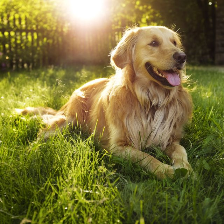

Original Dimensions :  (1000, 1500, 3)
1/1 [==============================] - 0s 15ms/step
Dog


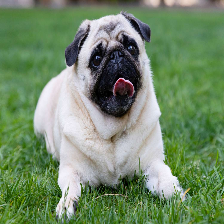

Original Dimensions :  (440, 293, 3)
1/1 [==============================] - 0s 18ms/step
Dog


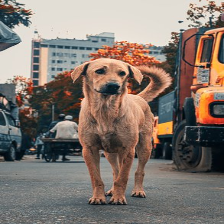

Original Dimensions :  (720, 1080, 3)
1/1 [==============================] - 0s 16ms/step
Cat


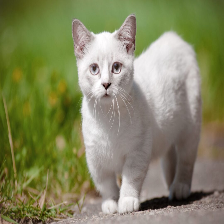

Original Dimensions :  (1925, 1920, 3)
1/1 [==============================] - 0s 20ms/step
Cat


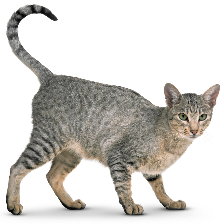

Original Dimensions :  (1197, 1200, 3)
1/1 [==============================] - 0s 17ms/step
Cat


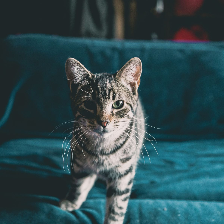

In [ ]:
GetResultForImage("dog-1.jpg")
GetResultForImage("dog-2.jpg")
GetResultForImage("dog-3.jpg")
GetResultForImage("cat-1.jpg")
GetResultForImage("cat-2.jpg")
GetResultForImage("cat-3.jpg")